In [1]:
#importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('voice.csv')#Reading the given File 'Voice.csv'
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [3]:
df.shape     #To know the shape of the data

(3168, 21)

In [4]:
df.isnull().sum() #There are no Null values in the given data

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [5]:
df.dtypes  #To know whetther all the datatypes of type int or float

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label        object
dtype: object

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
#Converting label datatype from object to int
lb=LabelEncoder()
df['label']=lb.fit_transform(df['label'])
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


In [8]:
df['label'].value_counts()

1    1584
0    1584
Name: label, dtype: int64

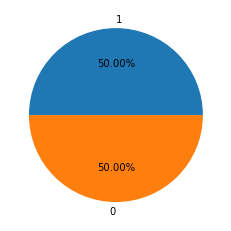

In [9]:
#Pie chart Representation for the given data
d1=df['label'].value_counts()
plt.pie(d1,labels=d1.index,autopct="%.2f%%")
plt.show()

In [10]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [11]:
x.head()
print(y.head())
y.head()
print(type(x))
print(type(y))

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int32
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [12]:
from sklearn.model_selection import train_test_split


In [13]:
x_tr,x_te,y_tr,y_te=train_test_split(x,y,test_size=0.20)
print(x_tr.shape)
print(x_te.shape)
print(y_tr.shape)
print(y_te.shape)

from sklearn.metrics import confusion_matrix,classification_report

(2534, 20)
(634, 20)
(2534,)
(634,)


# KNN Classification

In [20]:
from sklearn.neighbors import KNeighborsClassifier
m1=KNeighborsClassifier(n_neighbors=10)
m1.fit(x_tr,y_tr)
y_pred1=m1.predict(x_te)
y_pred1
print("shape=",x_tr.shape)
from sklearn.metrics import confusion_matrix,classification_report
cm1=confusion_matrix(y_te,y_pred1)
print(cm1)
print(classification_report(y_te,y_pred1))
print('Training Score',m1.score(x_tr,y_tr))
print('Testing Score',m1.score(x_te,y_te))

shape= (2534, 20)
[[233  81]
 [103 217]]
              precision    recall  f1-score   support

           0       0.69      0.74      0.72       314
           1       0.73      0.68      0.70       320

    accuracy                           0.71       634
   macro avg       0.71      0.71      0.71       634
weighted avg       0.71      0.71      0.71       634

Training Score 0.7663772691397001
Testing Score 0.7097791798107256


# Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier
m2=DecisionTreeClassifier(max_depth=7,criterion='gini')
m2.fit(x_tr,y_tr)
ypred_m2=m2.predict(x_te)
cm2=confusion_matrix(y_te,ypred_m2)
print(cm2)
print(classification_report(y_te,ypred_m2))

print('Training Score',m2.score(x_tr,y_tr))
print('Testing Score',m2.score(x_te,y_te))

[[305   9]
 [ 15 305]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       314
           1       0.97      0.95      0.96       320

    accuracy                           0.96       634
   macro avg       0.96      0.96      0.96       634
weighted avg       0.96      0.96      0.96       634

Training Score 0.994869771112865
Testing Score 0.9621451104100947


# Random forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
m3=RandomForestClassifier(n_estimators=60,max_depth=7,criterion='entropy',min_samples_split=10)
m3.fit(x_tr,y_tr)
ypred_m3=m3.predict(x_te)
cm3=confusion_matrix(y_te,ypred_m3)
print(cm3)
print(classification_report(y_te,ypred_m3))

print('Training Score',m3.score(x_tr,y_tr))
print('Testing Score',m3.score(x_te,y_te))

[[305   9]
 [ 11 309]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       314
           1       0.97      0.97      0.97       320

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634

Training Score 0.9928966061562746
Testing Score 0.9684542586750788


# SVM

In [18]:
from sklearn.svm import SVC
m4=SVC(kernel='linear',C=10)
m4.fit(x_tr,y_tr)
ypred_m4=m4.predict(x_te)
cm4=confusion_matrix(y_te,ypred_m4)
print(cm4)
print(classification_report(y_te,ypred_m4))

print('Training Score',m4.score(x_tr,y_tr))
print('Testing Score',m4.score(x_te,y_te))

[[305   9]
 [ 15 305]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       314
           1       0.97      0.95      0.96       320

    accuracy                           0.96       634
   macro avg       0.96      0.96      0.96       634
weighted avg       0.96      0.96      0.96       634

Training Score 0.9751381215469613
Testing Score 0.9621451104100947


# Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
m5=LogisticRegression(solver='liblinear')
m5.fit(x_tr,y_tr)
ypred_m5=m5.predict(x_te)
cm5=confusion_matrix(y_te,ypred_m5)
print(cm5)
print(classification_report(y_te,ypred_m5))

print('Training Score',m5.score(x_tr,y_tr))
print('Testing Score',m5.score(x_te,y_te))

[[270  44]
 [ 14 306]]
              precision    recall  f1-score   support

           0       0.95      0.86      0.90       314
           1       0.87      0.96      0.91       320

    accuracy                           0.91       634
   macro avg       0.91      0.91      0.91       634
weighted avg       0.91      0.91      0.91       634

Training Score 0.9112075769534334
Testing Score 0.9085173501577287


# Conclusion

Based on Precision,F1 Score,Recall values,Accuracy Score and Testing Score we can say that Random Forest algorithm is suitable for the given data where we are predicting the gender based on voice signals.